## Process in Machine learning
1.cleaning data
2.eda
3.preprocessing
4.model building


## data cleaning

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('sms_spam.csv')
df 

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5572,ham,The guy did some bitching but I acted like i'd...
5573,ham,Rofl. Its true to its name
5574,spam,A [redacted] loan for Rs.95000 is approved for...
5575,spam,hello . liked your work


In [3]:
df.sample(5)

,type,text
5338,ham,Sounds better than my evening im just doing my...
3425,spam,Am new 2 club & dont fink we met yet Will B gr...
1379,ham,"Ya tel, wats ur problem.."
3665,ham,Huh? 6 also cannot? Then only how many mistakes?
3386,ham,Ok can...


In [4]:
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5577, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5577 entries, 0 to 5576
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5577 non-null   object
 1   text    5576 non-null   object
dtypes: object(2)
memory usage: 87.3+ KB


In [7]:
df.isnull().sum()
df.duplicated().sum()

414

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['type']=encoder.fit_transform(df['type'])
df

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5572,0,The guy did some bitching but I acted like i'd...
5573,0,Rofl. Its true to its name
5574,1,A [redacted] loan for Rs.95000 is approved for...
5575,1,hello . liked your work


In [9]:
df.isnull().sum()

type    0
text    1
dtype: int64

In [10]:
df.duplicated().sum()

414

In [11]:
df=df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(5163, 2)

In [14]:
df.rename(columns={'type':'target'},inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_23620\3410061949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'type':'target'},inplace=True)


## EDA

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df['target'].value_counts()

0    4518
1     645
Name: target, dtype: int64

In [17]:
import matplotlib.pyplot as plt

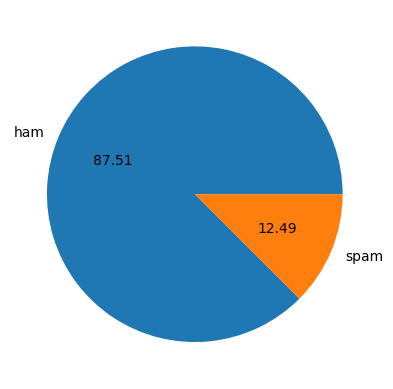

In [18]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
import nltk

In [20]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [22]:
df['text'].dtype=object
df['num_char']=df['text'].apply(len)
df.head()

AttributeError: property 'dtype' of 'Series' object has no setter

In [ ]:
df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

In [ ]:
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

In [ ]:
df[['num_char','num_word','num_sentence']].describe()

In [ ]:
#ham
df[df['target']==0][['num_char','num_word','num_sentence']].describe()

In [ ]:
#spam
df[df['target']==1][['num_char','num_word','num_sentence']].describe()

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,4))
sns.histplot(df[df['target']==0]['num_word'])
sns.histplot(df[df['target']==1]['num_word'],color='yellow')
sns.pairplot(df,hue='target')

In [ ]:
df.corr()

In [ ]:
sns.heatmap(df.corr(),annot=True)

## DATA PREPROCESSING

In [ ]:
import string
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords 
import nltk
ps=PorterStemmer()
def filter_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    ft=[]
    for i in text:
        if i.isalnum():
            ft.append(i)
    text=ft[:]#or we can use ft.copy()
    ft.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            ft.append(i)
    text=ft.copy()
    ft.clear()
    for i in text:
        ft.append(ps.stem(i))
    return " ".join(ft)
        

In [ ]:
filter_text('hello,i am good')

In [ ]:
df['filtered_text']=df['text'].apply(filter_text)
df.head()

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df['target']==1]['filtered_text'].str.cat(sep=" "))
plt.figure(figsize=(12,4))
plt.imshow(spam_wc)

In [ ]:
ham_wc=wc.generate(df[df['target']==0]['filtered_text'].str.cat(sep=""))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [ ]:
spam_corpus=[]
for msg in df[df['target']==1]['filtered_text'].tolist():
   for word in msg.split():
    spam_corpus.append(word)
spam_corpus

In [ ]:
len(spam_corpus)

In [ ]:
from collections import Counter
pdf=pd.DataFrame(Counter(spam_corpus).most_common(30))
#pdf
plt.figure(figsize=(15,8))
sns.barplot(x=0,y=1,data=pdf)
plt.show()

In [ ]:
ham_corpus=[]
for msg in df[df['target']==0]['filtered_text'].tolist():
   for word in msg.split():
    ham_corpus.append(word)
ham_corpus

In [ ]:
pdf=pd.DataFrame(Counter(ham_corpus).most_common(30))
plt.figure(figsize=(12,4))
sns.barplot(x=0,y=1,
           data=pdf)

In [ ]:
len(ham_corpus)//4518

In [ ]:
len(spam_corpus)//642

## model building


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
cv=CountVectorizer()
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(df['filtered_text']).toarray()
y=df['target'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [ ]:
from sklearn.metrics import accuracy_score,precision_score

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
gnb.fit(x_train,y_train)

y_pred=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

In [ ]:
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

In [ ]:
bnb.fit(x_train,y_train)
y_pred=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
lr=LogisticRegression(solver='liblinear',penalty='l1')
svc=SVC(kernel='sigmoid',gamma=1.0)
mnb=MultinomialNB()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier(max_depth=5)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
def best_Algo(clf,x_train,x_test,y_train,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    return accuracy_score(y_test,y_pred),precision_score(y_test,y_pred)

In [ ]:
clfs={
    'svc':svc,
    'mnb':mnb,
    'knn':knn,
    'dtc':dtc,
    'abc':abc,
    'rfc':rfc,
    'bc':bc,
    'etc':etc,
    'gbc':gbc,
    'xgb':xgb
}

In [ ]:
name,acc,prec=[],[],[]
for nm,clf in clfs.items():
    name.append(nm)
    accuracy,precision=best_Algo(clf,x_train,x_test,y_train,y_test)
    acc.append(accuracy)
    prec.append(precision)
d = {'name':name,'accuracy':acc,'precision':prec}
clf_df=pd.DataFrame(d)
clf_df

In [ ]:
sns.catplot(x='name',y='precision',data=clf_df,kind='bar',height=5)

In [ ]:
name,acc,prec=[],[],[]
for nm,clf in clfs.items():
    name.append(nm)
    accuracy,precision=best_Algo(clf,x_train,x_test,y_train,y_test)
    acc.append(accuracy)
    prec.append(precision)
d = {'name':name,'accuracy':acc,'precision':prec}
clf_df=pd.DataFrame(d)
clf_df

In [ ]:
sns.catplot(x='name',y='precision',data=clf_df,kind='bar',height=5)

In [ ]:
from sklearn.ensemble import VotingClassifier
voting=VotingClassifier(estimators=[('mnb',mnb),('knn',knn),('rfc',rfc)])

In [ ]:
voting.fit(x_train,y_train)
y_pred=voting.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

In [ ]:
estimators=[('mnb',mnb),('knn',knn),('rfc',rfc)]
final_estimator=RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)


In [ ]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(accuracy_score(y_test,y_pred),precision_score(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))